<a href="https://colab.research.google.com/github/CherylC15/PythonProjects/blob/main/MLProject_Healthcare%20Provider%20Fraud%20Detection%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After EDA through MySQL,

1.   Import libraries
2.   EDA
 *   Provider
 *   Beneficiary
 *   Inpatient
 *   Outpatient
3. concact inpatient and outpatient




  --



In [ ]:
# Import libraries

import numpy as np # provides powerful numerical arrays objects, and routines to manipulate them
import scipy as sp
from scipy import stats # high-level data processing routines. Optimization, regression, interpolation
import pandas as pd # data processing

%matplotlib inline
import matplotlib.pylab as plt #2-D visualization, “publication-ready” plots

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
# Import data
df_train_prov = pd.read_csv('/content/MLProject/Train-1542865627584.csv')
df_train_ben = pd.read_csv('/content/MLProject/Train_Beneficiarydata-1542865627584.csv')
df_train_ip = pd.read_csv('/content/MLProject/Train_Inpatientdata-1542865627584.csv')
df_train_op = pd.read_csv('/content/MLProject/Train_Outpatientdata-1542865627584.csv')

Provider
1. 5410 unique values
2. 506 fraud provider; 9.4%

In [ ]:
df_train_prov.shape
df_train_prov.head

<bound method NDFrame.head of       Provider PotentialFraud
0     PRV51001             No
1     PRV51003            Yes
2     PRV51004             No
3     PRV51005            Yes
4     PRV51007             No
...        ...            ...
5405  PRV57759             No
5406  PRV57760             No
5407  PRV57761             No
5408  PRV57762             No
5409  PRV57763             No

[5410 rows x 2 columns]>

Beneficiary

1.   no duplicates
2.   Total 38556 unique BeneID
3.   Need to calculate age in Python
4.   Drop Race, State, County, PartACov, PartBCov

In [ ]:
df_train_ben = pd.read_csv('/content/MLProject/Train_Beneficiarydata-1542865627584.csv')
df_train_ben.shape
df_train_ben.head()

NameError: ignored

In [ ]:
df_train_benC = df_train_ben.drop(columns=['Race','State', 'County', 'NoOfMonths_PartACov','NoOfMonths_PartBCov'])

In [ ]:
df_train_benC['DOD'] = pd.to_datetime(df_train_benC['DOD'], format='%Y-%m-%d')
df_train_benC['DOB'] = pd.to_datetime(df_train_benC['DOB'], format='%Y-%m-%d')
df_train_benC["DOD"].max()

Timestamp('2009-12-01 00:00:00')

In [ ]:
df_train_benC[df_train_benC.DOD == df_train_benC.DOD.max()]
df_train_benC["DOD"].fillna("2009-12-01", inplace = True)

In [ ]:
# Add "age" column
df_train_benC['Age'] = df_train_benC['DOD'].dt.year - df_train_benC['DOB'].dt.year
df_train_benC.head()

,BeneID,DOB,DOD,Gender,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,2009-12-01,1,0,1,2,1,2,2,...,1,1,2,1,1,36000,3204,60,70,66
1,BENE11002,1936-09-01,2009-12-01,2,0,2,2,2,2,2,...,2,2,2,2,2,0,0,30,50,73
2,BENE11003,1936-08-01,2009-12-01,1,0,1,2,2,2,2,...,2,1,2,2,2,0,0,90,40,73
3,BENE11004,1922-07-01,2009-12-01,1,0,1,1,2,2,2,...,1,1,1,1,2,0,0,1810,760,87
4,BENE11005,1935-09-01,2009-12-01,1,0,2,2,2,2,1,...,1,2,2,2,2,0,0,1790,1200,74


In [ ]:
mean_age = np.mean(df_train_benC['Age'] )

print(mean_age)

73.12866277894858


Inpatient


1. distinct BeneID 30401; total claim 38992. Different from Kaggle data???
2. Avg stay 5.493 days
3. Max 7 claim/year
4. Avg Amount Reimbursed 10.1k
5. drop (OperatingPhysician), OtherPhysician, DeductibleAmyPd, ClmProcedureCode_1~


In [ ]:
df_train_ipC= df_train_ip.drop(columns=['OtherPhysician','ClmDiagnosisCode_10','ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5','ClmProcedureCode_6'])
df_train_ipC.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1'],
      dtype='object')

In [ ]:
df_train_ipC.shape
df_train_ipC.head

In [ ]:
# How many beneficiary claimed ip
df_train_benC["has_claimed_ip"] = df_train_benC["BeneID"].isin(df_train_ipC["BeneID"])
claimed_ip = df_train_benC["has_claimed_ip"].sum()
percentage_claimed_ip = np.round((claimed_ip/38556) * 100, 2)
print(percentage_claimed_ip)

81.15


In [ ]:
# Join ip and prov data
df_train_ipJ = df_train_ipC.join(df_train_prov.set_index('Provider'), on='Provider')

In [ ]:
df_train_ip_all = df_train_ipJ.join(df_train_benC.set_index('BeneID'), on='BeneID')
df_train_ip_all.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1',
       'PotentialFraud', 'DOB', 'DOD', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt'

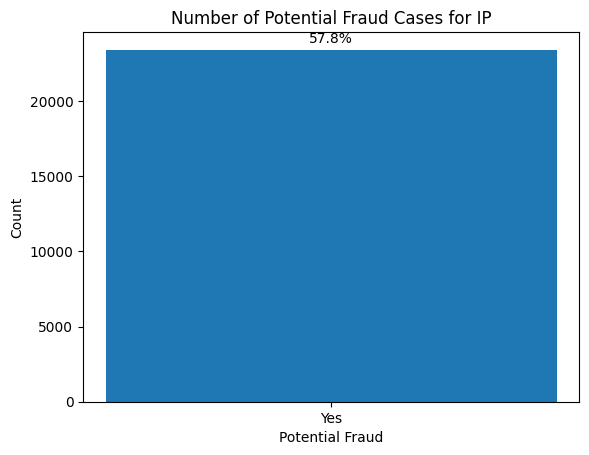

In [ ]:
df_train_ip_frd = df_train_ip_all[df_train_ip_all['PotentialFraud'] == 'Yes']
counts = df_train_ip_frd['PotentialFraud'].value_counts()

# Calculate the percentage of each value in the 'PotentialFraud' column
percentages = counts.values / len(df_train_ip_all) * 100

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
bars = ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for IP')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

Alzheimer

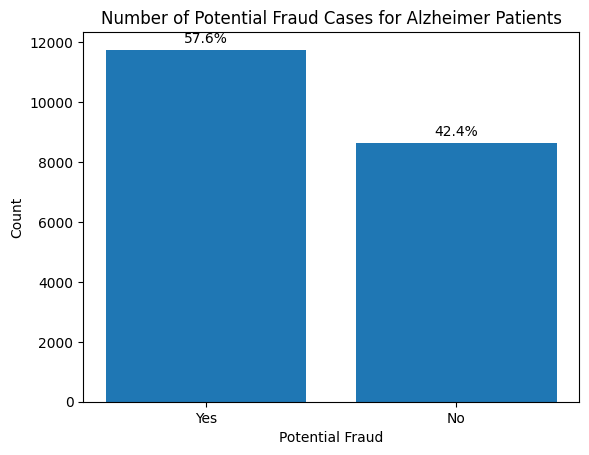

In [ ]:
df_train_ip_Alz = df_train_ip_all[df_train_ip_all['ChronicCond_Alzheimer'] == 1]
counts = df_train_ip_Alz['PotentialFraud'].value_counts()

# Calculate the percentage of each value in the 'PotentialFraud' column
percentages = counts.values / counts.sum() * 100

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
bars = ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for Alzheimer Patients')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

Heartfailure

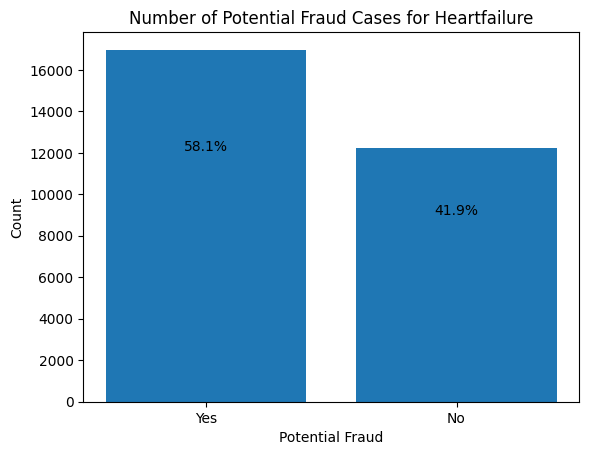

In [ ]:
df_train_ip_hf = df_train_ip_all[df_train_ip_all['ChronicCond_Heartfailure'] == 1]

counts = df_train_ip_hf['PotentialFraud'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for Heartfailure')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

percentages = counts.values / counts.sum() * 100
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)


plt.show()

Kidney Disease

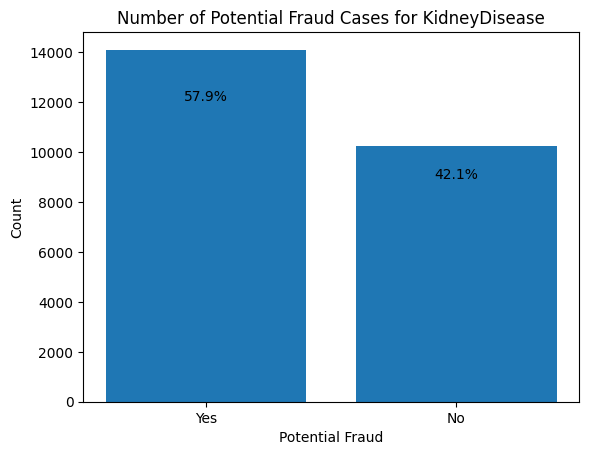

In [ ]:
df_train_ip_kd = df_train_ip_all[df_train_ip_all['ChronicCond_KidneyDisease'] == 1]

counts = df_train_ip_kd['PotentialFraud'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for KidneyDisease')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

percentages = counts.values / counts.sum() * 100
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.show()

Cancer

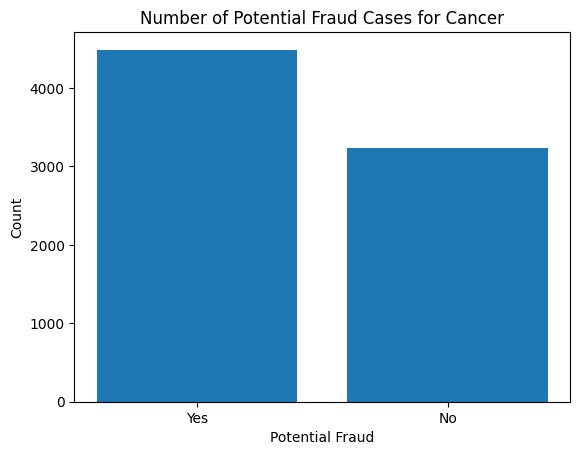

In [ ]:
df_train_ip_cn = df_train_ip_all[df_train_ip_all['ChronicCond_Cancer'] == 1]

counts = df_train_ip_cn['PotentialFraud'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for Cancer')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

percentages = counts.values / counts.sum() * 100
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.show()

Obstr Pulmonary

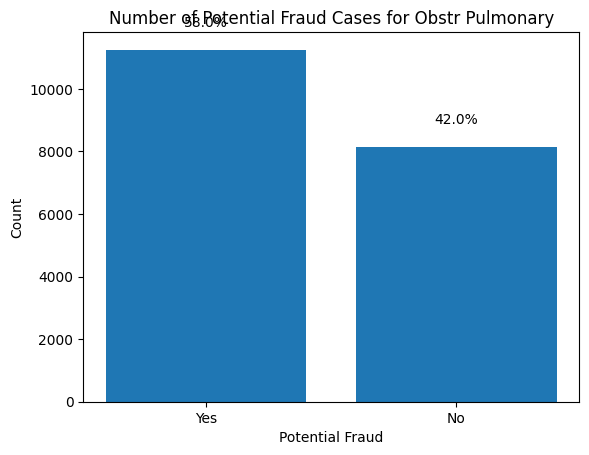

In [ ]:

df_train_ip_op = df_train_ip_all[df_train_ip_all['ChronicCond_ObstrPulmonary'] == 1]

counts = df_train_ip_op['PotentialFraud'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for Obstr Pulmonary')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

percentages = counts.values / counts.sum() * 100
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.show()

Depression

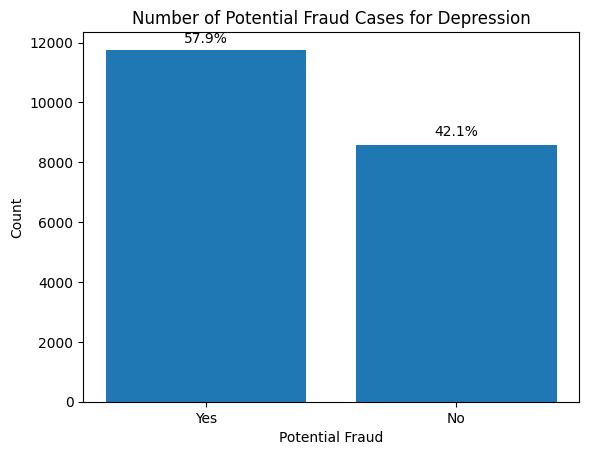

In [ ]:
df_train_ip_dp = df_train_ip_all[df_train_ip_all['ChronicCond_Depression'] == 1]

counts = df_train_ip_dp['PotentialFraud'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for Depression')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

percentages = counts.values / counts.sum() * 100
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.show()

Diadetes

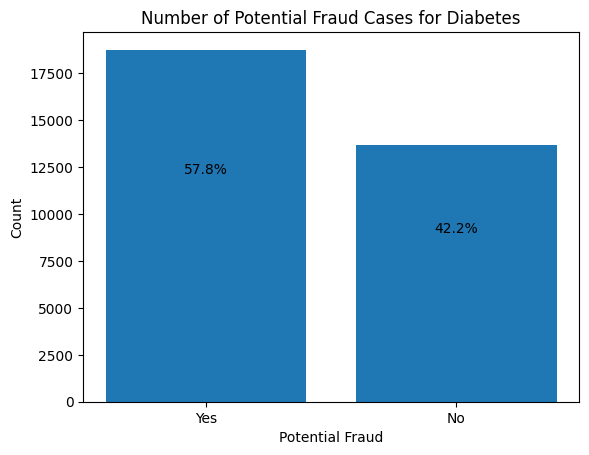

In [ ]:
df_train_ip_di = df_train_ip_all[df_train_ip_all['ChronicCond_Diabetes'] == 1]

counts = df_train_ip_di['PotentialFraud'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for Diabetes')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

percentages = counts.values / counts.sum() * 100
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.show()

Ischemic Heart

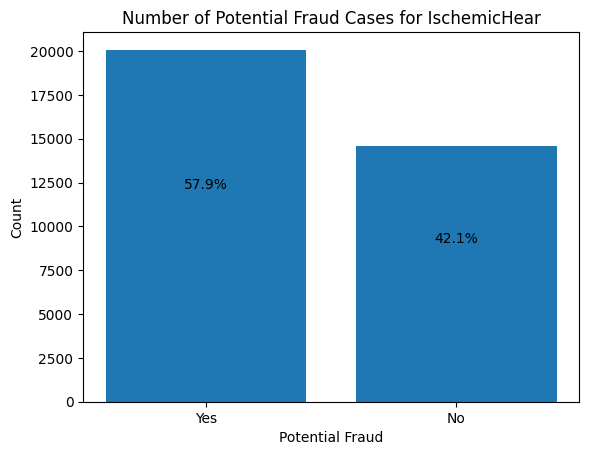

In [ ]:
df_train_ip_ih = df_train_ip_all[df_train_ip_all['ChronicCond_IschemicHeart'] == 1]

counts = df_train_ip_ih['PotentialFraud'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for IschemicHear')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

percentages = counts.values / counts.sum() * 100
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.show()

Osteoporasis

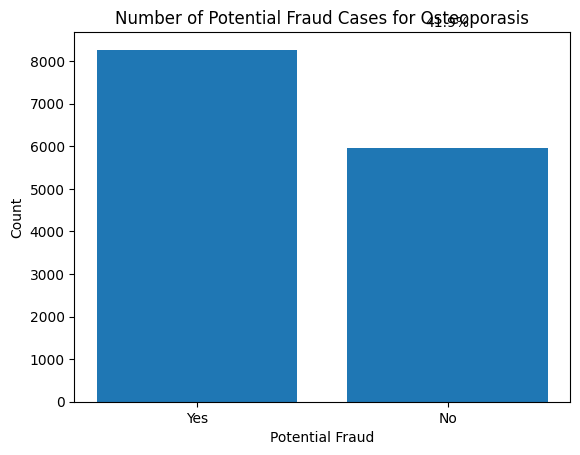

In [ ]:
df_train_ip_os = df_train_ip_all[df_train_ip_all['ChronicCond_Osteoporasis'] == 1]

counts = df_train_ip_os['PotentialFraud'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for Osteoporasis')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

percentages = counts.values / counts.sum() * 100
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.show()

Rheumatoidarthritis

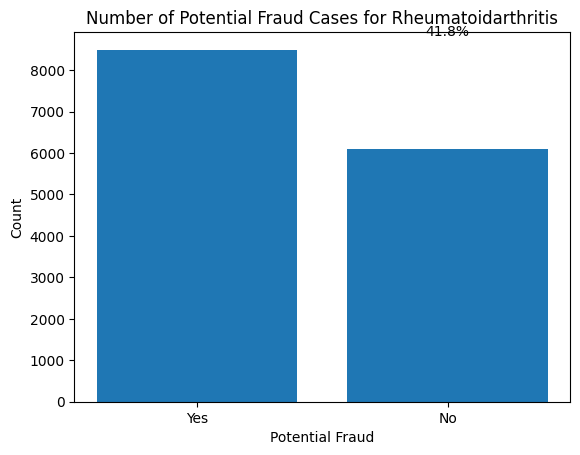

In [ ]:
df_train_ip_rh = df_train_ip_all[df_train_ip_all['ChronicCond_rheumatoidarthritis'] == 1]

counts = df_train_ip_rh['PotentialFraud'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for Rheumatoidarthritis')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

percentages = counts.values / counts.sum() * 100
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.show()

Stroke

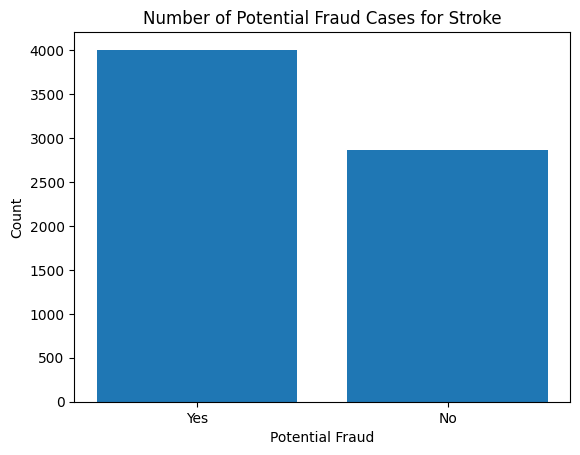

In [ ]:
df_train_ip_st = df_train_ip_all[df_train_ip_all['ChronicCond_stroke'] == 1]

counts = df_train_ip_st['PotentialFraud'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for Stroke')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

percentages = counts.values / counts.sum() * 100
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.show()

Outpatient
1. count(*), count(distinct BeneID), count(distinct ClaimID)-- 517737; 133980; 517737
2. 189394 fraud 36%
3. drop (OperatingPhysician), OtherPhysician, ClmDiagnosisCode_2-10, ClmProcedureCode all, ClmAdmitDiagnosisCode

In [ ]:
df_train_op.shape

(517737, 27)

In [ ]:
df_train_opC1 = df_train_op.drop(columns=['OtherPhysician','ClmDiagnosisCode_10','ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5','ClmProcedureCode_6'])

In [ ]:
df_train_opC1['AttendingPhysician'] = df_train_opC1['AttendingPhysician'].fillna("None")
df_train_opC1['OperatingPhysician'] = df_train_opC1['OperatingPhysician'].fillna("None")
df_train_opC1 =df_train_opC1.fillna(0)

In [ ]:
# How many beneficiary claimed op
df_train_benC["has_claimed_op"] = df_train_benC["BeneID"].isin(df_train_opC1["BeneID"])
claimed_op = df_train_benC["has_claimed_op"].sum()
percentage_claimed_op = np.round((claimed_op/len(df_train_benC)) * 100, 2)
print(f"Percentage of beneficiaries who have claimed OP claim: {percentage_claimed_op}%")


Percentage of beneficiaries who have claimed OP claim: 96.7%


In [ ]:
df_train_op_all = df_train_opC1.join(df_train_prov.set_index('Provider'), on='Provider')
df_train_op_all.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,78943,V5866,...,0,0,0,0,0,0,0.0,0,56409,Yes
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,6115,0,...,0,0,0,0,0,0,0.0,0,79380,No
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,2723,0,...,0,0,0,0,0,0,0.0,0,0,No
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,71988,0,...,0,0,0,0,0,0,0.0,0,0,Yes
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,82382,30000,...,4280,7197,V4577,0,0,0,0.0,0,71947,Yes


In [ ]:
df_train_op_all = df_train_op_all.join(df_train_benC.set_index('BeneID'), on='BeneID')
df_train_op_all.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,has_claimed_op
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,78943,V5866,...,2,2,2,0,0,30,50,73,False,True
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,6115,0,...,2,2,2,0,0,90,40,73,False,True
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,2723,0,...,2,2,2,0,0,90,40,73,False,True
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,71988,0,...,1,1,2,0,0,1810,760,87,False,True
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,82382,30000,...,1,1,2,0,0,1810,760,87,False,True


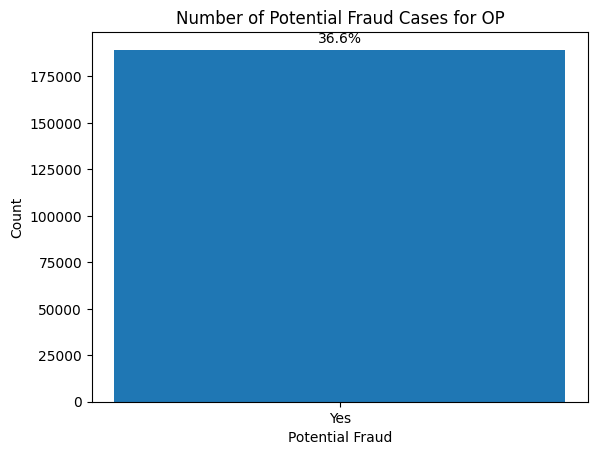

In [ ]:
df_train_op_frd = df_train_op_all[df_train_op_all['PotentialFraud'] == 'Yes']
counts = df_train_op_frd['PotentialFraud'].value_counts()

# Calculate the percentage of each value in the 'PotentialFraud' column
percentages = counts.values / len(df_train_op_all) * 100

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
bars = ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for OP')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

Concat IP and OP

In [ ]:
# concatenate data frames vertically
df_train_ipop = pd.concat([df_train_ip_all, df_train_op_all])
df_train_ipop.fillna('None')
# reset index
df_train_ipop = df_train_ipop.reset_index(drop=True)

df_train_ipop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  object        
 3   ClaimEndDt                       558211 non-null  object        
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               558099 non-null  object        
 7   OperatingPhysician               541567 non-null  object        
 8   AdmissionDt                      40474 non-null   object        
 9   ClmAdmitDiagnosisCode            558211 non-null  object        
 10  DeductibleAmtPaid                557312 non-